In [2]:
import pandas as pd
import matplotlib.pyplot as plt



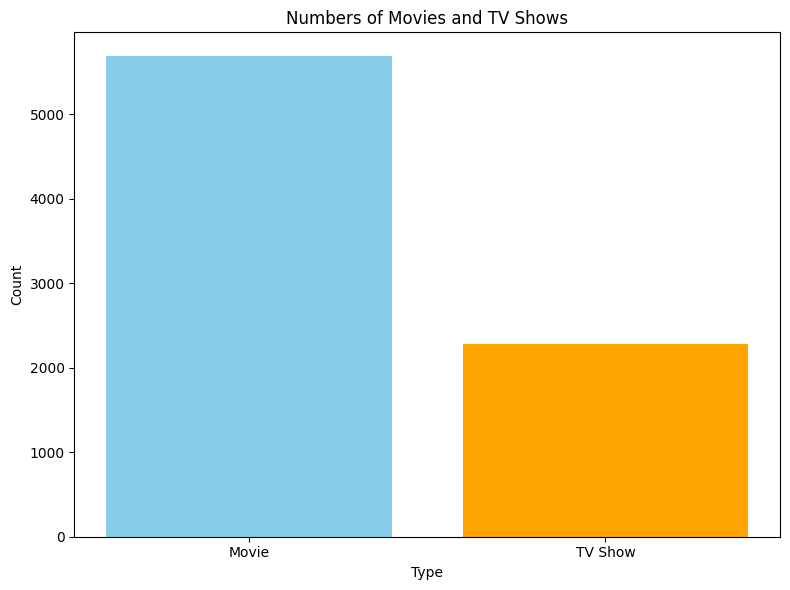

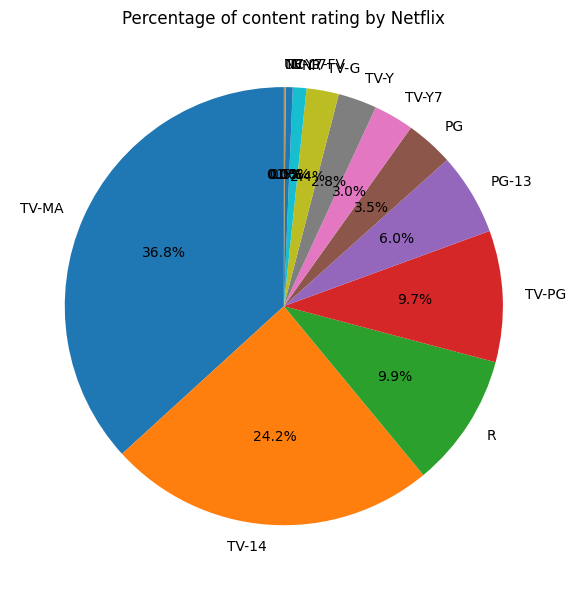

In [8]:
# Load data
data = pd.read_csv(r'netflix_titles.csv')

# Clean data
df = data.dropna(subset=['type', 'release_year', 'rating', 'country', 'duration'])

# Count types
type_counts = df['type'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'])
plt.title('Numbers of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()

# Save plot
plt.savefig('movies_v_s_tv_shows.png', dpi=300, bbox_inches='tight')
plt.show()

rating_counts=df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts.values,labels=rating_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Percentage of content rating by Netflix') 
plt.tight_layout()
plt.savefig('content_rating_pie.png')
plt.show()

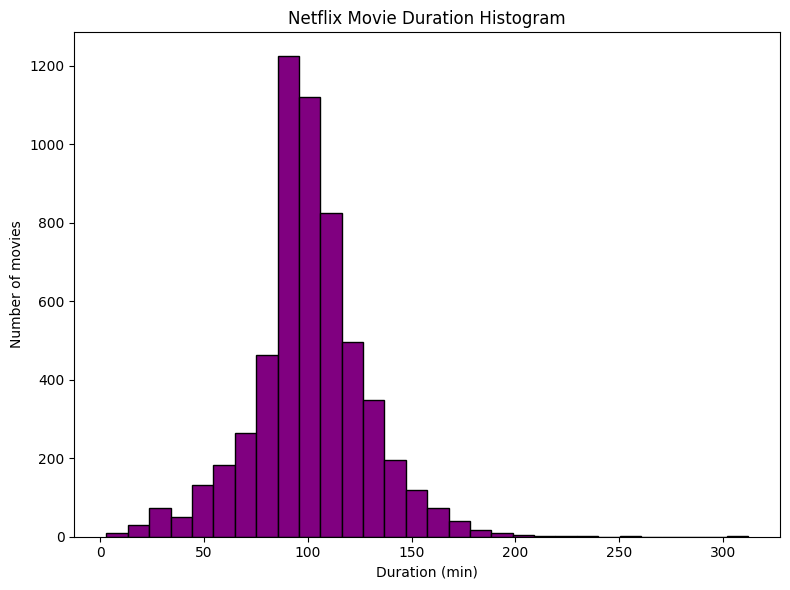

In [12]:
movie_df=df[df['type']=='Movie'].copy()
movie_df['duration_int']=movie_df['duration'].str.replace('min','').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30,color='purple',edgecolor='black')
plt.title('Netflix Movie Duration Histogram')
plt.xlabel('Duration (min)')
plt.ylabel('Number of movies')
plt.tight_layout()

plt.show()


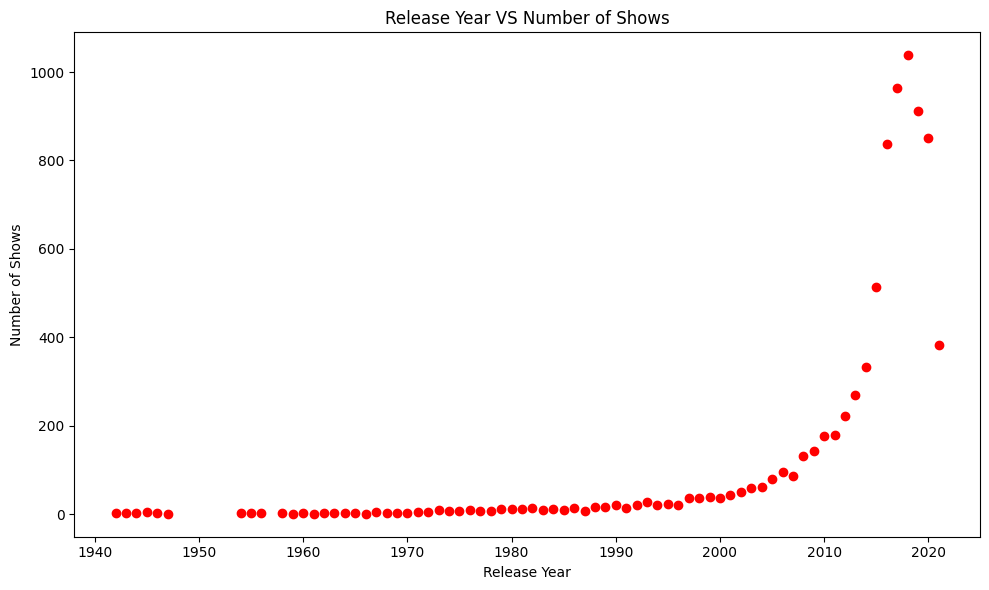

In [13]:
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='red')
plt.title('Release Year VS Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('release_year_Scatter.png')
plt.show()


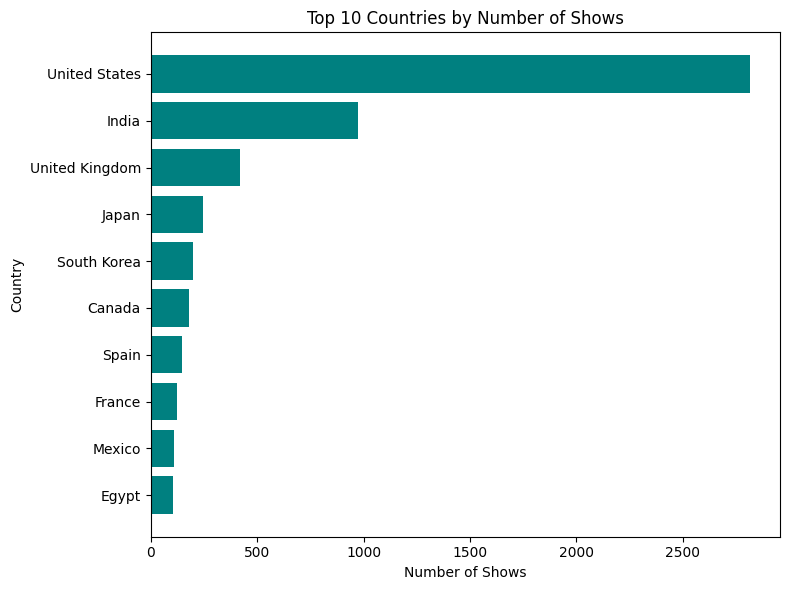

In [9]:
# Top 10 countries by number of shows
country_counts = df['country'].value_counts().head(10)

plt.figure(figsize=(8, 6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title('Top 10 Countries by Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Optional: highest bar on top
plt.tight_layout()
plt.show()


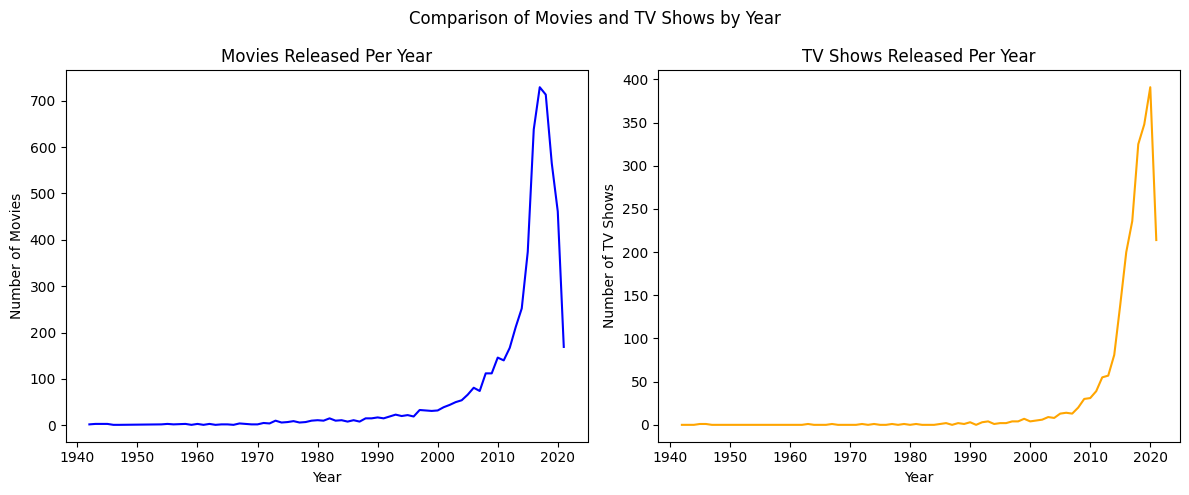

In [11]:
import matplotlib.pyplot as plt

# Group by release_year and type (Movie/TV Show)
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

# Second subplot: TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

# Overall title
fig.suptitle('Comparison of Movies and TV Shows by Year')

plt.tight_layout()
plt.show()
